#  Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [63]:
meal_info=pd.read_csv('D:\\CAPSTONE PROJECT\\meal_info.csv')  # meal_info csv dataset
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [64]:
fulfilment_center_info=pd.read_csv('D:\\CAPSTONE PROJECT\\fulfilment_center_info.csv') # fulfilment_center_info csv dataset
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [65]:
train=pd.read_csv('D:\\CAPSTONE PROJECT\\train.csv') # train csv dataset
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


# Merging dataset

In [66]:
train=train.merge(fulfilment_center_info,on='center_id') # merging train and fulfilment dataset on center_id ....How = inner join
data=train.merge(meal_info,on='meal_id')# merging train dataset with meal_info on meal_id ... how = inner
data.head() # complete dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [36]:
data.info() # checking info of our dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [7]:
data.nunique() # checking the unique values of each features in our dataset here 0=index 1=columns

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [8]:
data.shape # checking the number of rows and columns..
print('The number of rows are ',data.shape[0])
print('\nThe number of features are ',data.shape[1])

The number of rows are  456548

The number of features are  15


In [9]:
data.describe() # The Five point summary of our dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000



#  Checking Null values

In [6]:
data.isnull().sum() # checking null values in our dataset

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

## checking correlation between features

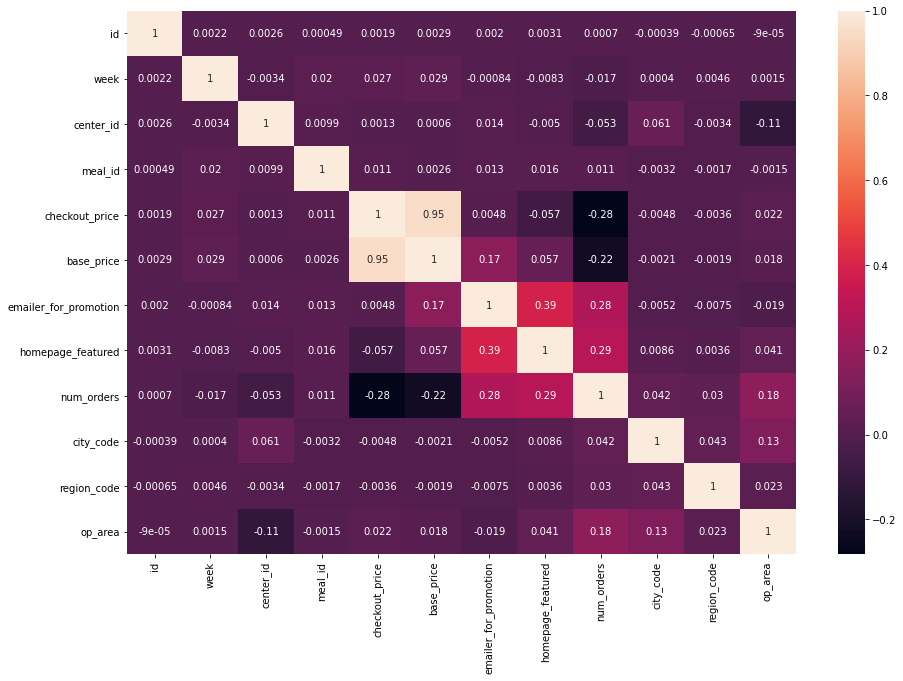

In [11]:
plt.figure(figsize=(15,10)) # size of our Heatmap plot
sns.heatmap(data.corr(),annot=True) # correlation plot using heatmap
plt.show()

##### checkout_price is highly correlated with base_price

###  checking correlation using VIF (variance inflation factor) 1/(1-R2)

In [12]:
num_data = data.select_dtypes(np.number) # taking only numerical data in new variable

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    # VIF can be found only for numerical data
vif_data=pd.DataFrame()
vif_data['vif']=[variance_inflation_factor(num_data.values,i) for i in range(len(num_data.columns))]
vif_data['features']=num_data.columns

In [14]:
vif_data.sort_values(by='vif',ascending=False) # sorting vif in decending orders

,vif,features
5,96.787442,base_price
4,92.138183,checkout_price
9,54.773930,city_code
0,47.072657,id
11,15.594389,op_area
3,13.714651,meal_id
10,10.888187,region_code
2,4.227009,center_id
1,4.190665,week
8,1.857933,num_orders


#### vif beyond 10 is not good as it shows features are highly correlated with each other

## understanding dataset in business perspective

## i) Number of orders for week

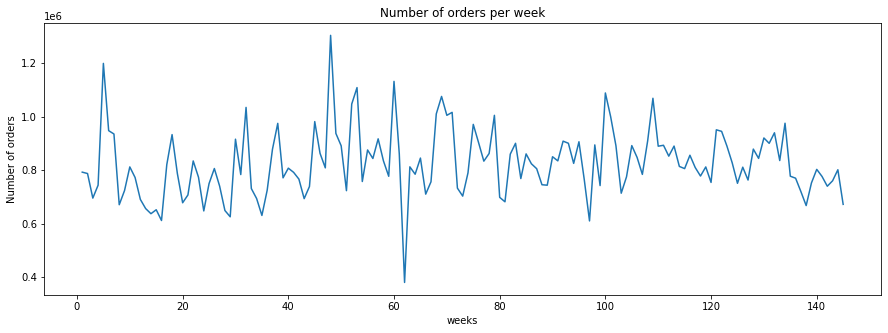

In [15]:
week=data.groupby(['week'])['num_orders'].sum() # grouping week and suming num_orders 
week=pd.DataFrame(week)
week=week.reset_index()


## ploting of week V/S num_orders 

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='num_orders',data=week)
plt.title('Number of orders per week')
plt.xlabel('weeks')
plt.ylabel('Number of orders')
plt.show()

###### Highest orders recieved are approximately in 50th week.
###### There was drastic drop in number of orders between 60 to 70 week

## ii) Number of orders for center id

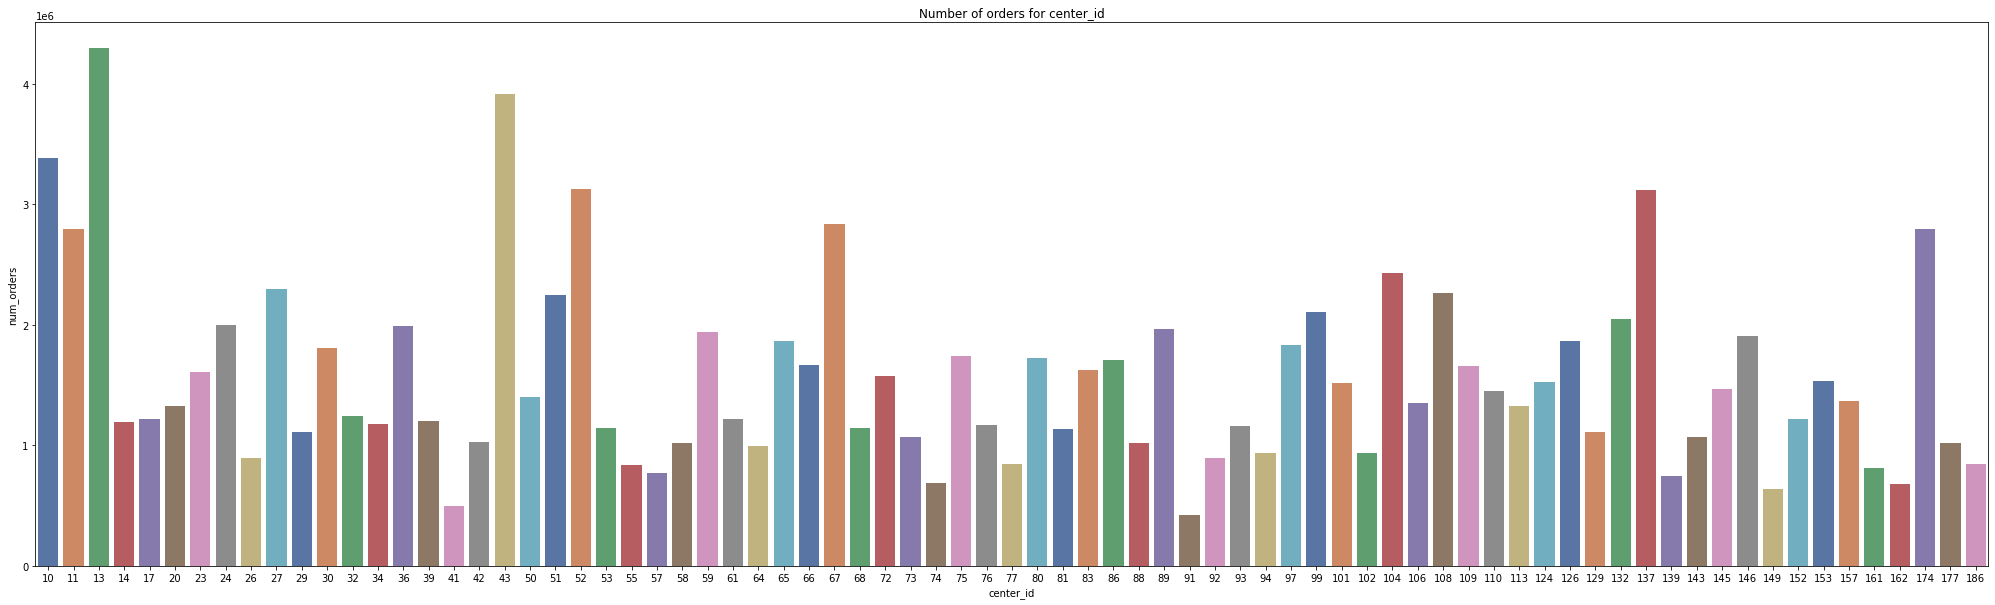

In [57]:
center=data.groupby(['center_id'])['num_orders'].sum() # grouping center id and suming num_orders 
center=pd.DataFrame(center)
center=center.reset_index()


## ploting center ID V/S num_orders
 
plt.figure(figsize=(35,10))
sns.barplot(x='center_id',y='num_orders',data=center,palette='deep')
plt.title('Number of orders for center_id')
plt.xlabel('center_id')
plt.ylabel('num_orders')
plt.show()

##### Highest order was recieved from center id 13 and lowest were recieved from 41 and 91

## iii) Number of orders for Meal_Id

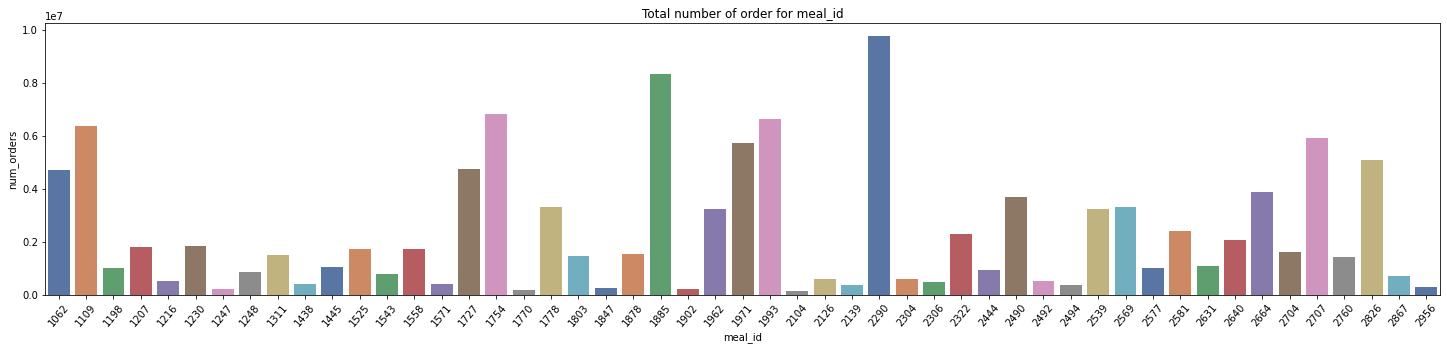

In [58]:
meal = data.groupby(['meal_id'])[['num_orders']].sum()
plt.figure(figsize=(25,5))
sns.barplot(x=meal.index, y=meal['num_orders'],palette="deep")
plt.xticks(rotation='50')
plt.title('Total number of order for meal_id')
plt.show()

#### We can see that we got highest number of orders from meal_id 2290,1885,1993,1754,1109,1971,1727,1062 2707,2826 and lowest from 1247,1770,1438,1847,1902,2104,2956. 

## iv) Number of orders based on city_code

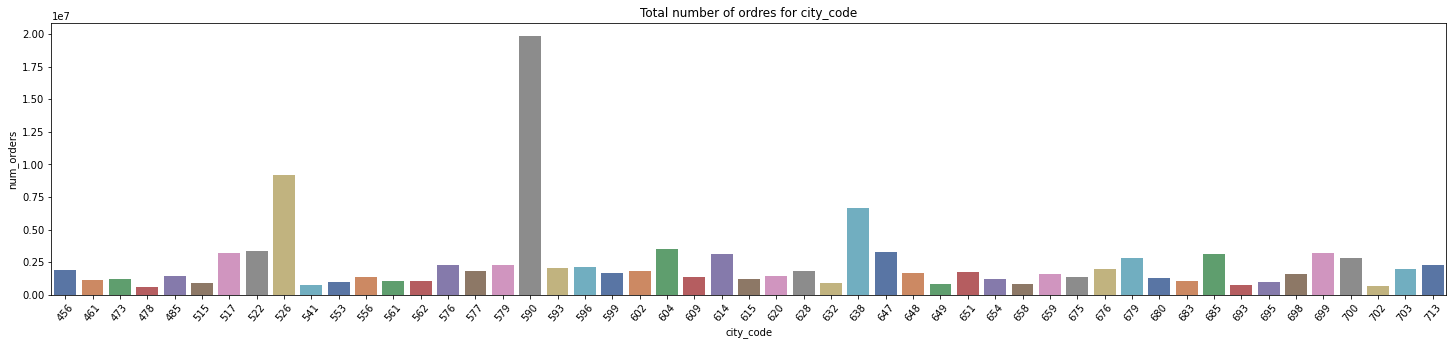

In [59]:
city = data.groupby(['city_code'])[['num_orders']].sum()
plt.figure(figsize=(25,5))
sns.barplot(x=city.index, y=city['num_orders'],palette='deep')
plt.xticks(rotation='50')
plt.title('Total number of ordres for city_code')
plt.show()

#### Highest number of orders were recieved from city code 590,526,638 and lowest orders where from 478,541,702,693

## v) Number of orders based on region_code

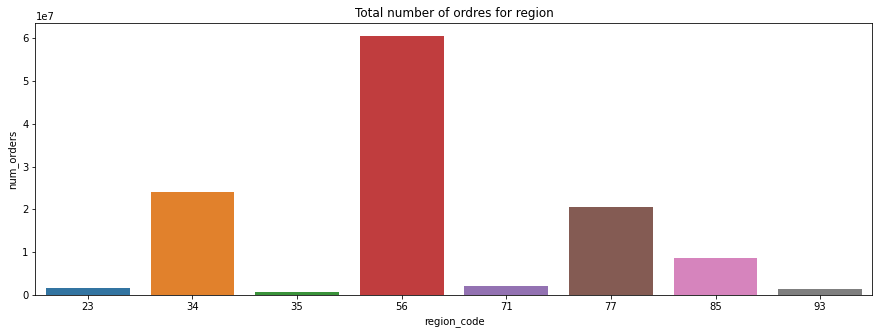

In [60]:
region = data.groupby(['region_code'])[['num_orders']].sum()
plt.figure(figsize=(15,5))
sns.barplot(x=region.index, y=region['num_orders'])
plt.title('Total number of ordres for region')
plt.show()

#### Region code 56 was getting highest number of orders and lowest orders were reported from 35,23,93,71

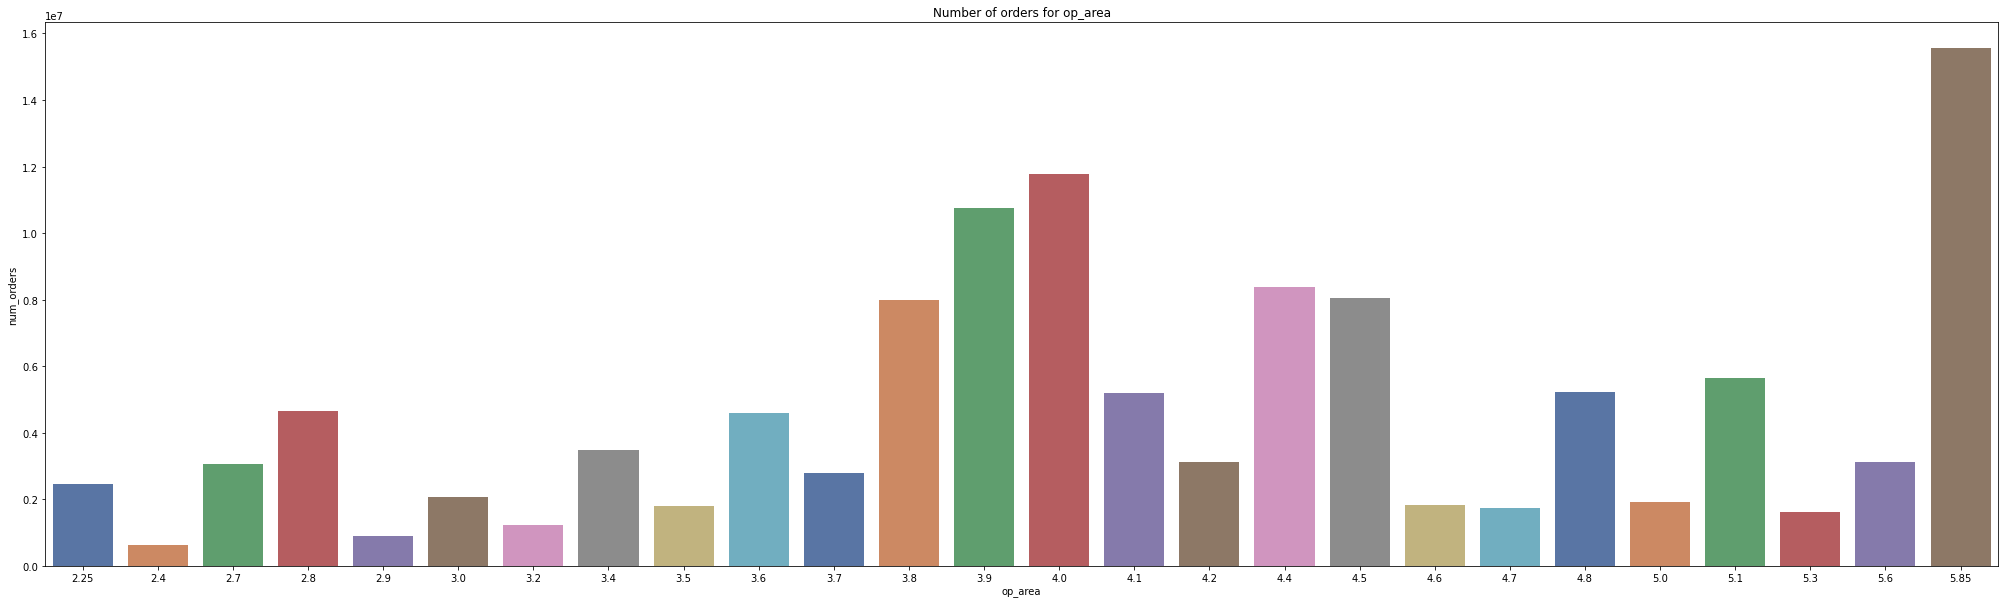

In [15]:
area=data.groupby(['op_area'])['num_orders'].sum() # grouping center id and suming num_orders 
area=pd.DataFrame(area)
area=area.reset_index()


## ploting center ID V/S num_orders
 
plt.figure(figsize=(35,10))
sns.barplot(x='op_area',y='num_orders',data=area,palette='deep')
plt.title('Number of orders for op_area')
plt.xlabel('op_area')
plt.ylabel('num_orders')
plt.show()

## iii) Number of orders based on cuisine and category

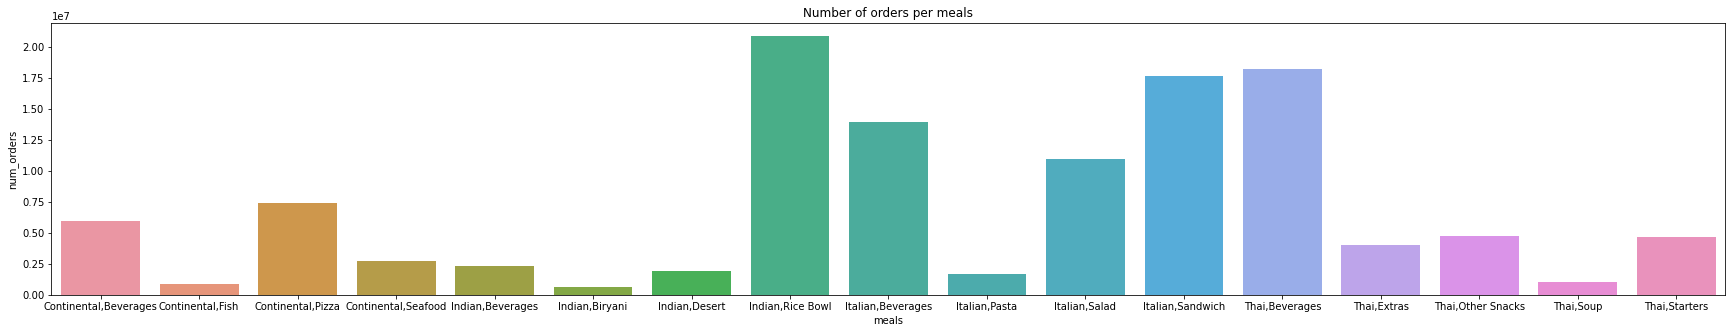

In [26]:
meal=data.groupby(['cuisine','category'])['num_orders'].sum() # grouping cuisine and category and suming num_orders
meal=pd.DataFrame(meal)
meal=meal.reset_index()
meal['meals']=meal.apply(lambda x:x['cuisine']+','+x['category'],axis=1)
meal

## ploting meals V/S num_orders

plt.figure(figsize=(30,5))
sns.barplot(x='meals',y='num_orders',data=meal)
plt.title('Number of orders per meals')
plt.xlabel('meals')
plt.ylabel('num_orders')
plt.show()

#### Indian (Rice Bowl), Italian (Beverages), italian (Sandwich), Thai (Beverages), Italian (salad) were among most preferred meals and Continental (Fish), Indian (Biryani), Thai (Soup) was least preferred meals.

1. Beverages from Italian and Thai are most preferred unlike from Indian and continental.
2. Rice Bowl from India are in high demand.
3. Italian Sandwich is also most preferred.

## iv) Number of orders per category

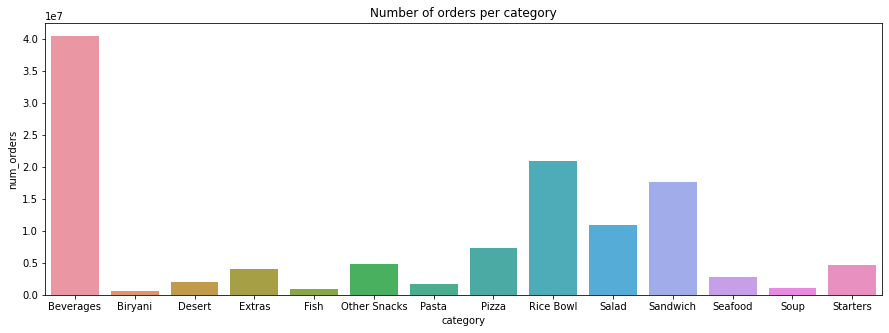

In [28]:
category=data.groupby(['category'])['num_orders'].sum() # grouping category and suming num_orders
category=pd.DataFrame(category)
category=category.reset_index()
category

# ploting category V/S num_orders

plt.figure(figsize=(15,5))
sns.barplot(x='category',y='num_orders',data=category)
plt.title('Number of orders per category')
plt.show()

##### In categories Rice Bowl, Sandwich, Salad and Beverages were most preffered and Fish,Soup and Biryani were among least preffered.

## v) Number of orders based of cuisine

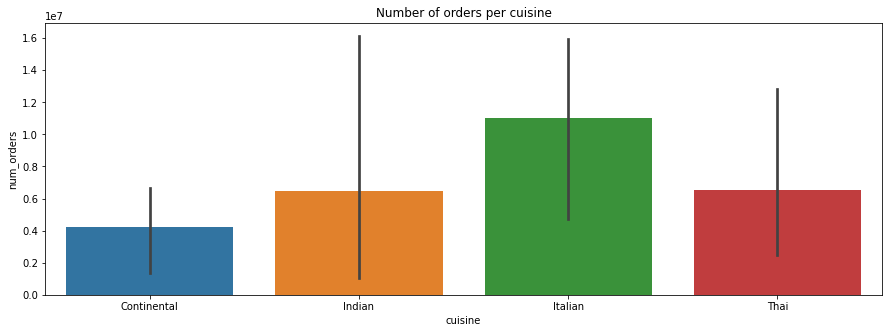

In [29]:
plt.figure(figsize=(15,5))   # ploting cuisine V/S num_orders
sns.barplot(x='cuisine',y='num_orders',data=meal)
plt.title('Number of orders per cuisine')
plt.show()

##### Most preferred is Italian followed by Thai, Indian and Continental.

## vi) Number of orders per center types

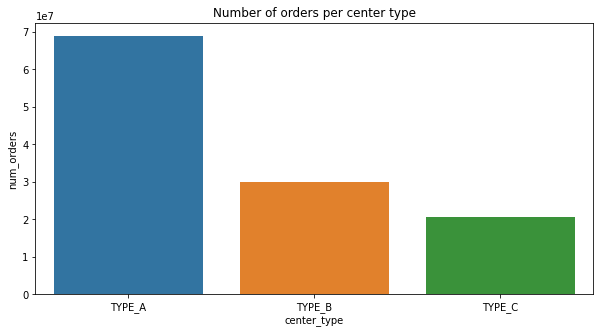

In [30]:
type1=data.groupby(['center_type'])['num_orders'].sum() # grouping center_type V/S num_orders
type1=pd.DataFrame(type1)
type1=type1.reset_index()

# ploting center type V/S num_orders

plt.figure(figsize=(10,5))
sns.barplot(x='center_type',y='num_orders',data=type1)
plt.title('Number of orders per center type')
plt.show()

##### Recieved most orders from Type A center and least from Type C center

## vii) Number of orders as per center type

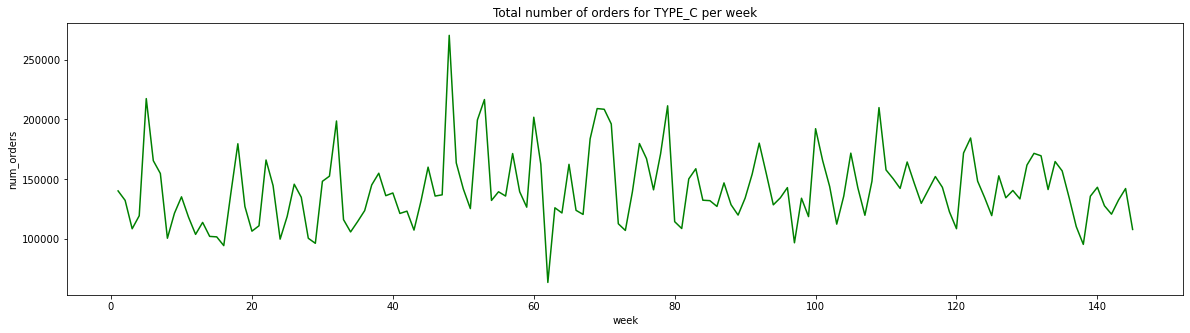

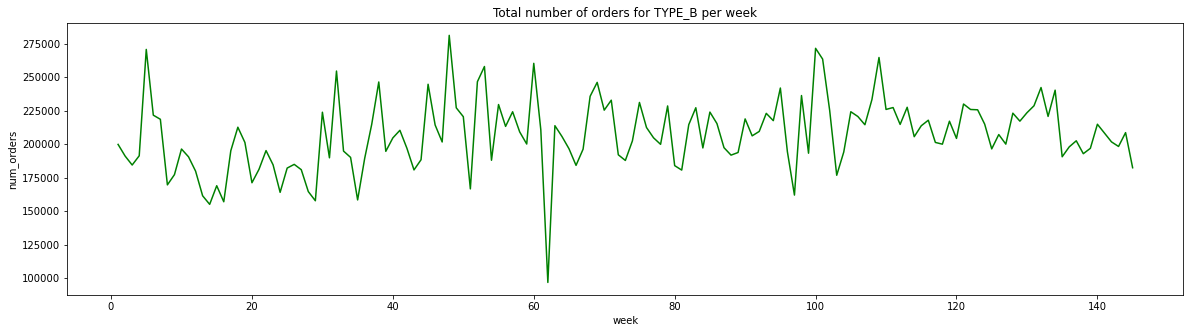

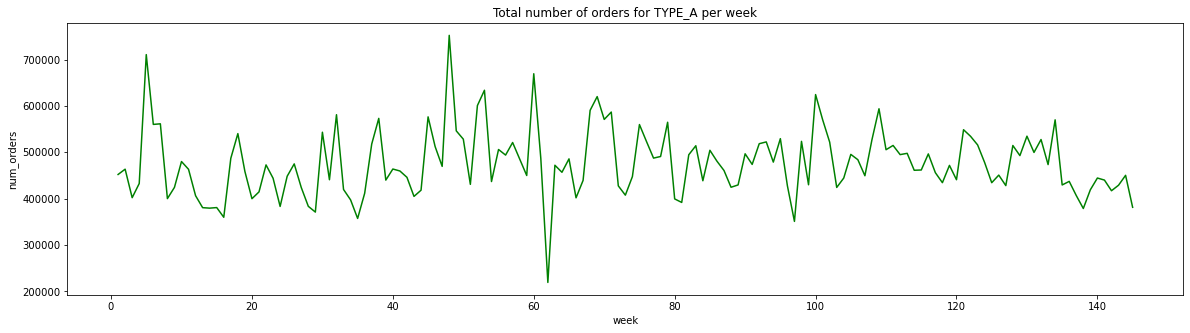

In [56]:
center_type = data['center_type'].unique()
for i in center_type:
    center_type = data[data['center_type']==i].groupby(['week'])[['num_orders']].sum()
    plt.figure(figsize=(20,5))
    sns.lineplot(x=center_type.index, y =center_type['num_orders'], color='green')
    plt.title('Total number of orders for {} per week'.format(i))
    # plt.xticks(rotation='90')
    plt.show()

## vii) Number of orders per category

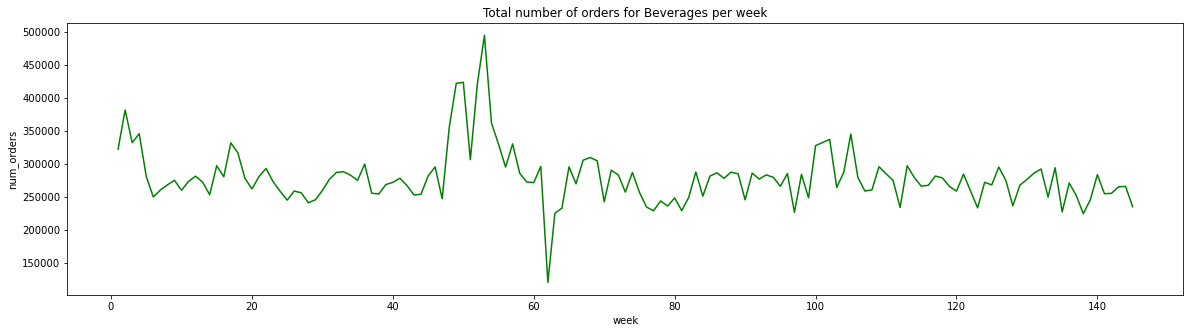

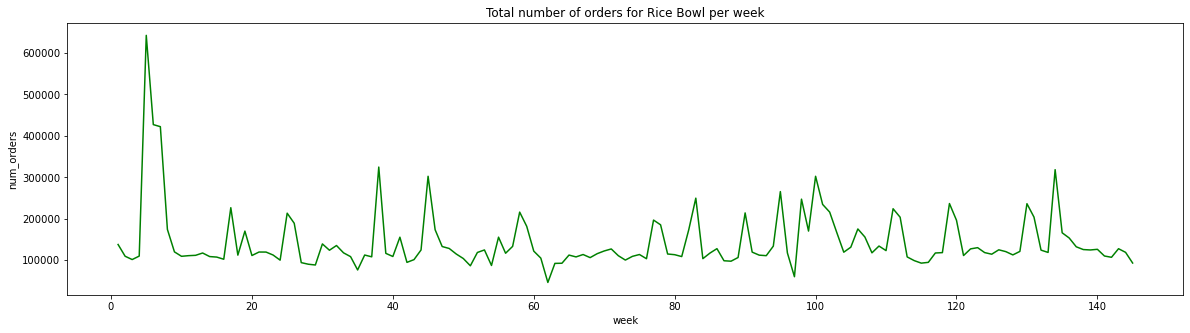

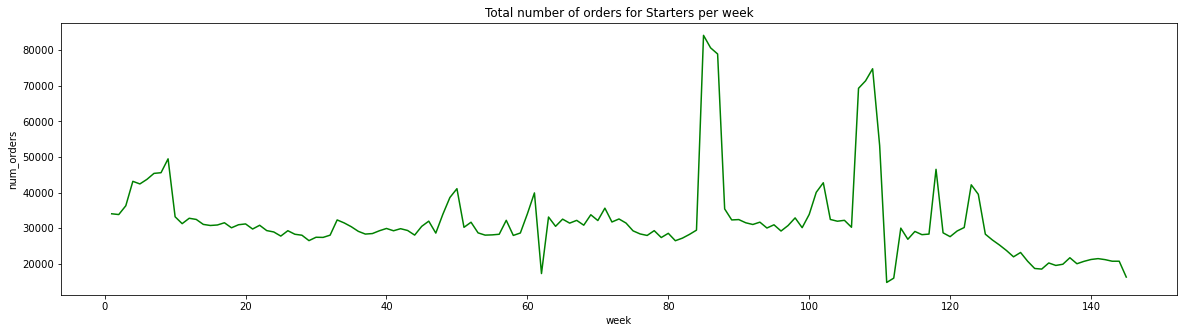

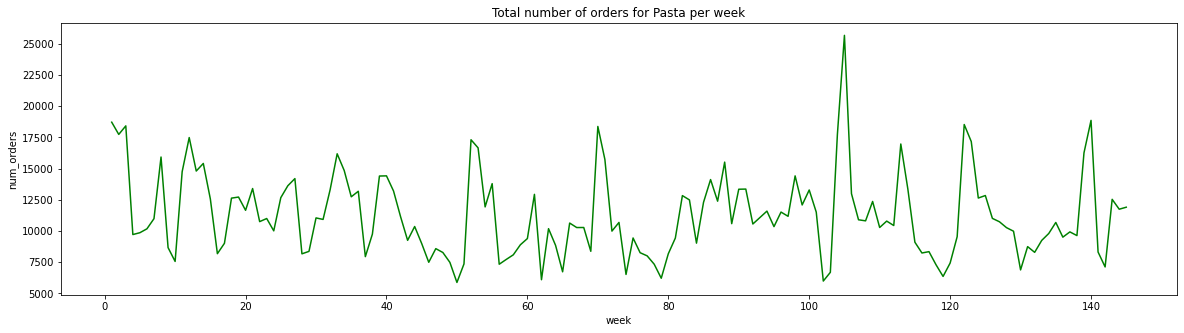

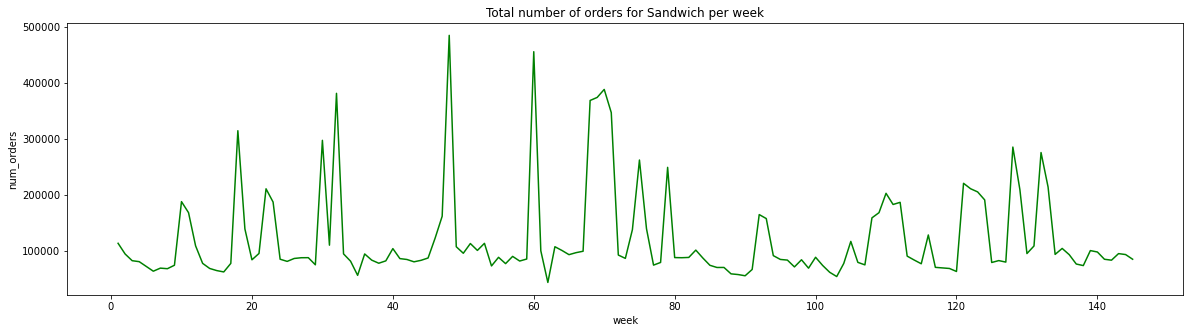

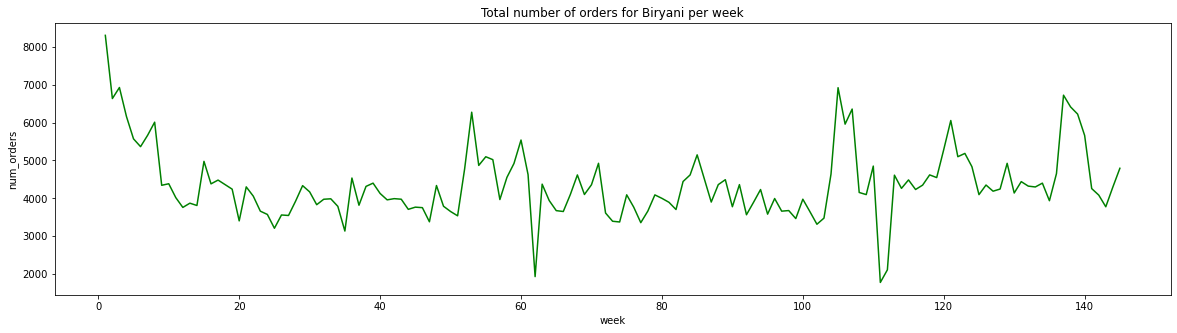

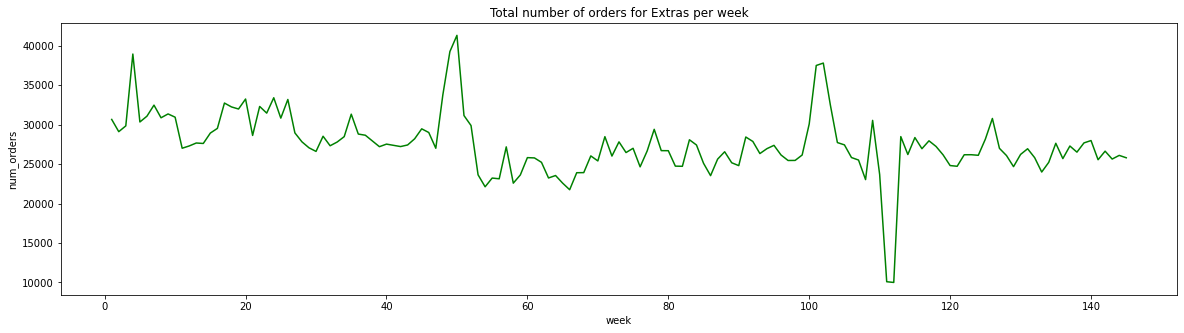

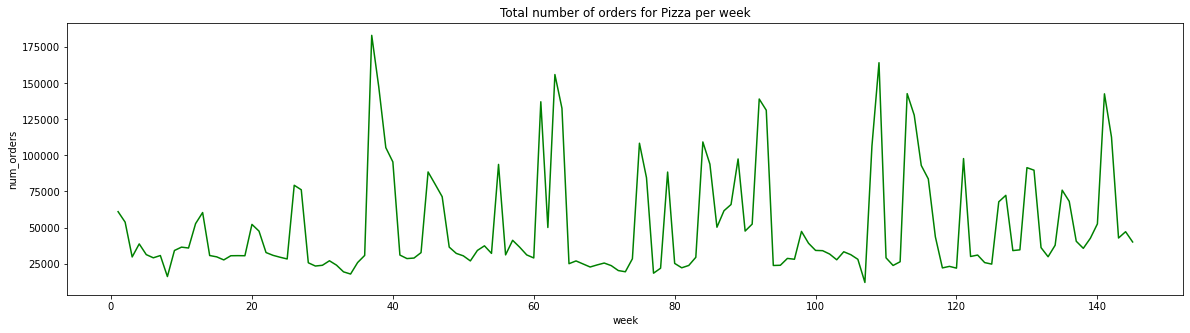

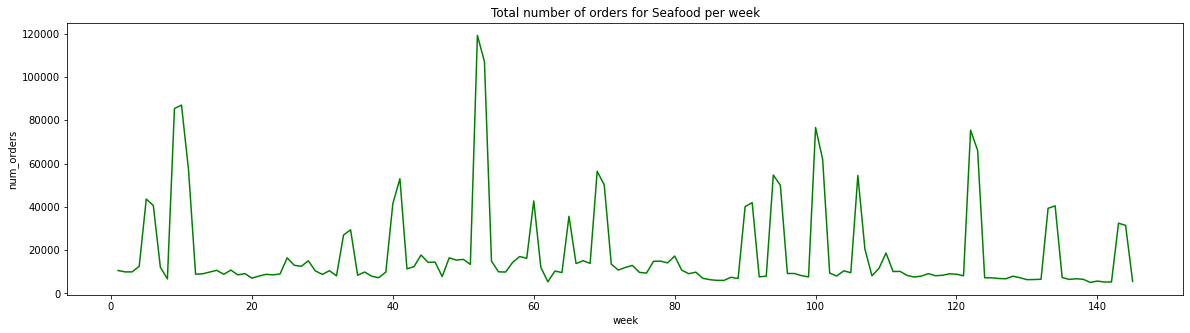

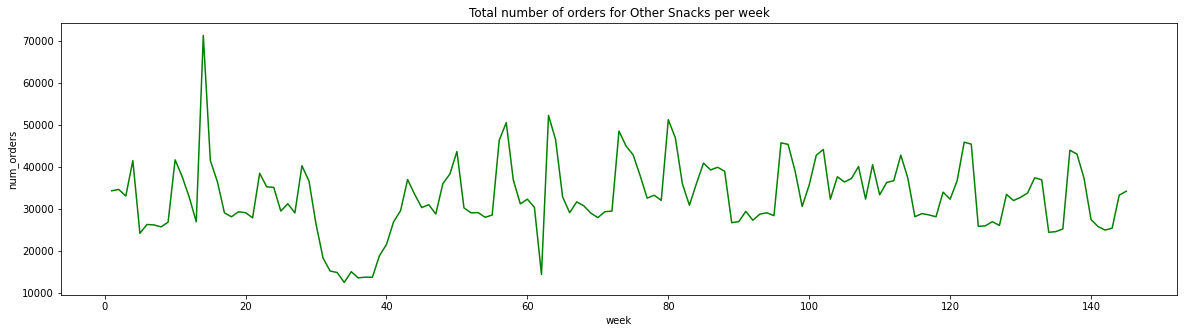

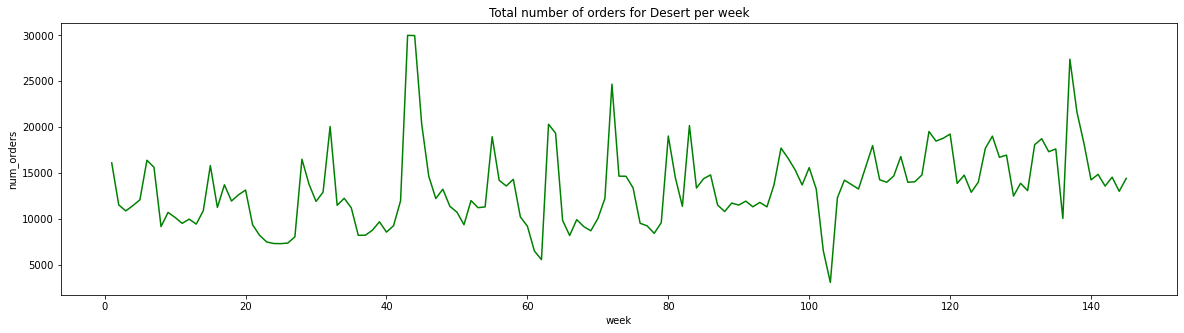

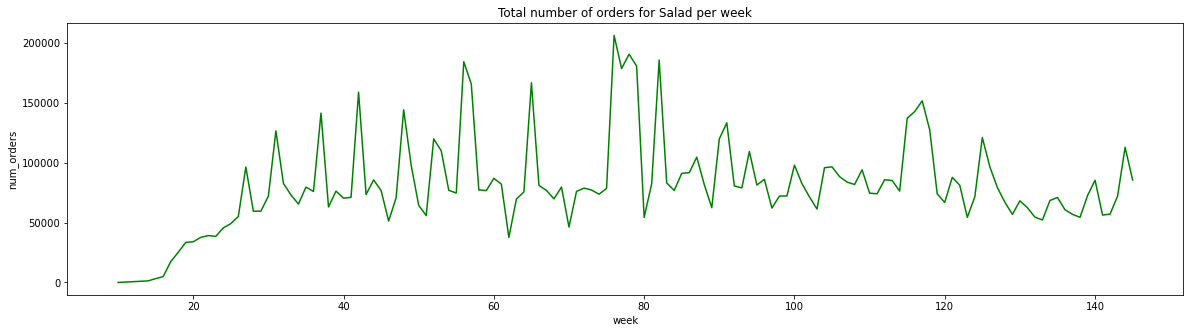

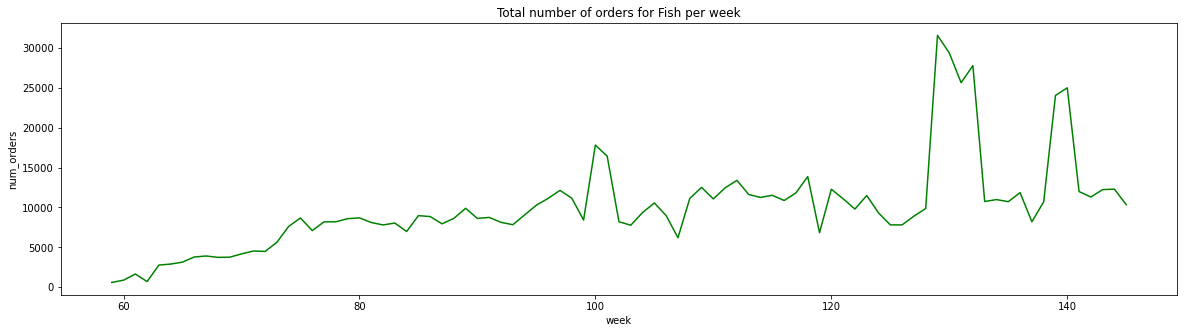

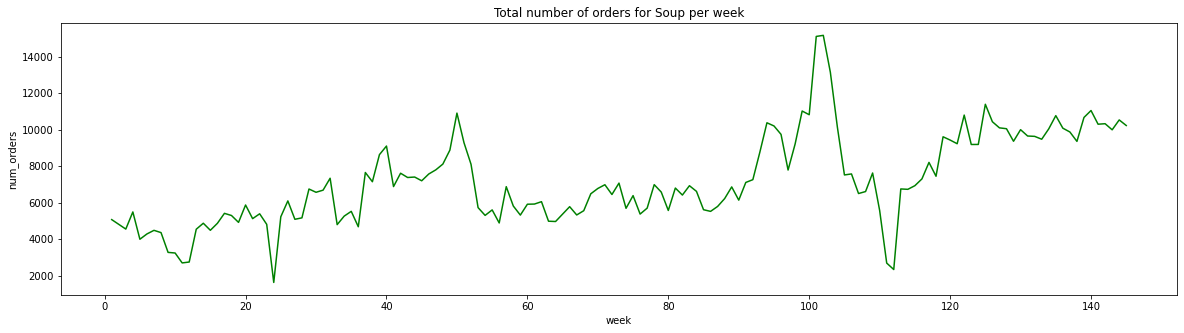

In [46]:
category = data['category'].unique()
for i in category:
    category= data[data['category']==i].groupby(['week'])[['num_orders']].sum()
    plt.figure(figsize=(20,5))
    sns.lineplot(x=category.index, y =category['num_orders'], color='green')
    plt.title('Total number of orders for {} per week'.format(i))
    plt.show()

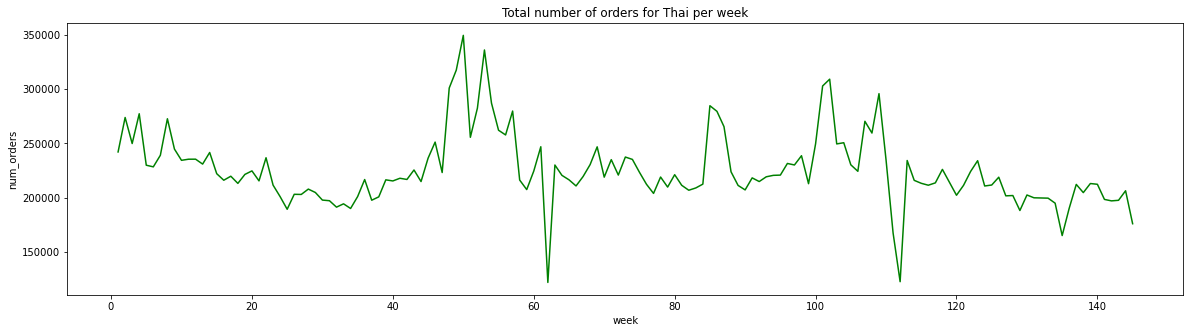

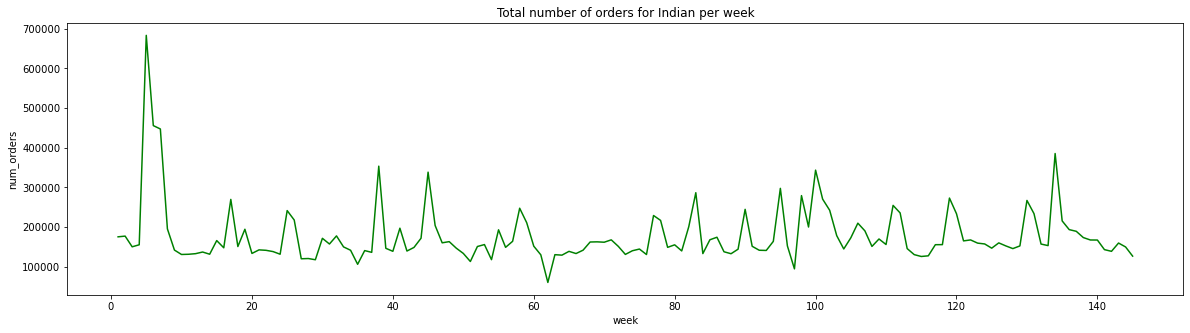

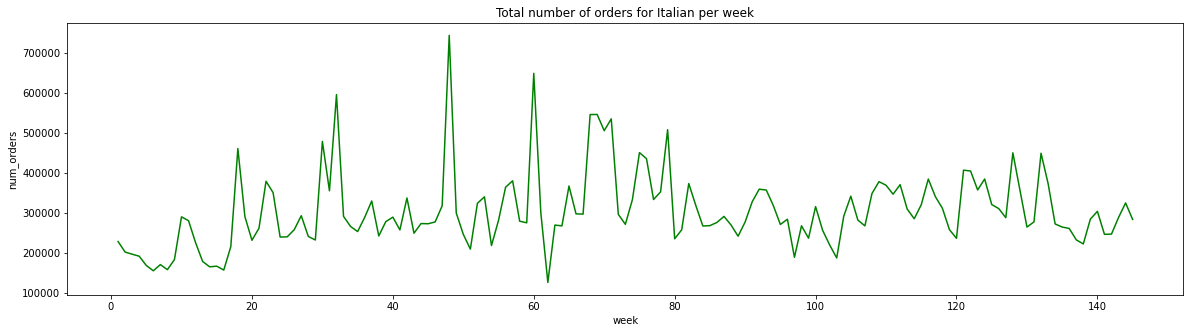

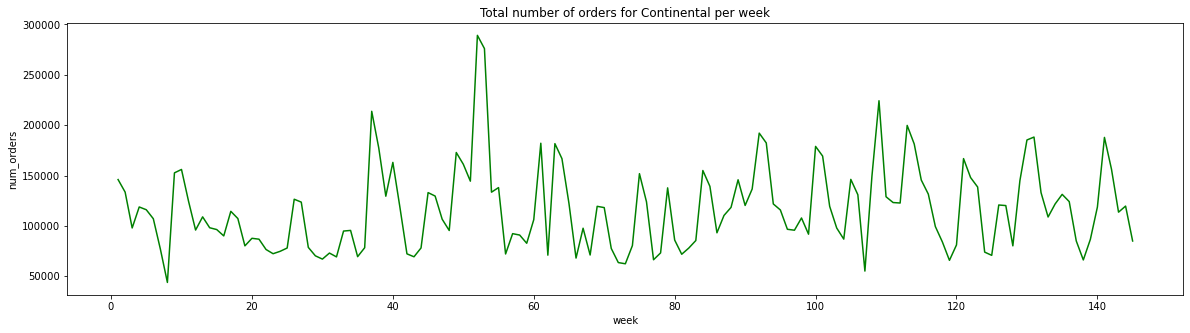

In [50]:
cuisine = data['cuisine'].unique()
for i in cuisine:
    cuisine = data[data['cuisine']==i].groupby(['week'])[['num_orders']].sum()
    plt.figure(figsize=(20,5))
    sns.lineplot(x=cuisine.index, y =cuisine['num_orders'], color='green')
    plt.title('Total number of orders for {} per week'.format(i))
    plt.show()

## vii) number of orders based on center type and category

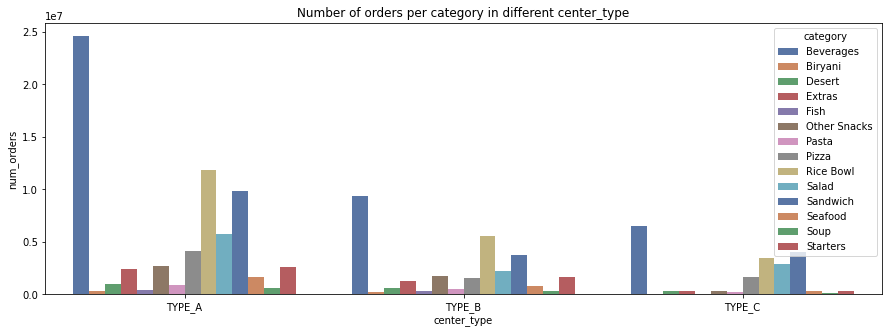

In [51]:
type2=data.groupby(['category','center_type'])['num_orders'].sum() # groupig category and center type suming num_orders
type2=pd.DataFrame(type2)
type2=type2.reset_index()

## ploting center type V/S num_orders and comparing with category

plt.figure(figsize=(15,5))
sns.barplot(x='center_type',y='num_orders',hue='category',data=type2,palette='deep')
plt.title('Number of orders per category in different center_type')
plt.show()

1. We can see most of the orders are from Type_A center in which Beverages has got huge demand and least preffered is Biryani and fish. 
2. In Type_B Beverages are ordered most and Biryani, Soup and fish are least ordered.
3. In Type_C Beverages and Sandwich team are preferred and Biryani, Desert, Extras, Fish, Other Snacks, Seafood, Soup, Starters are least preferred

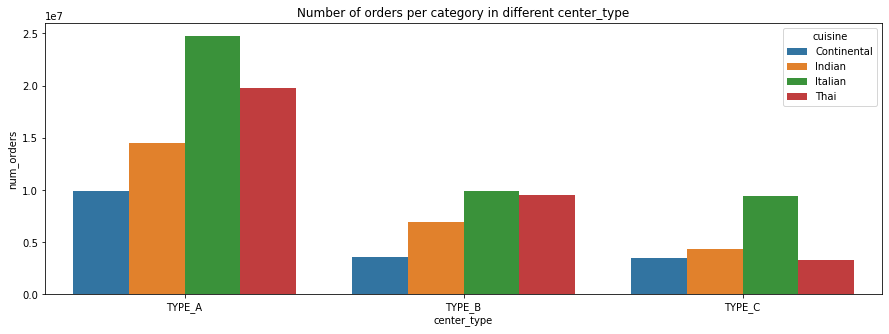

In [53]:
type3=data.groupby(['cuisine','center_type'])['num_orders'].sum() # grouping cuisine and center type and suming num_orders
type3=pd.DataFrame(type3)
type3=type3.reset_index()

# ploting center type V/S num_orders comparing with cuisine

plt.figure(figsize=(15,5))
sns.barplot(x='center_type',y='num_orders',hue='cuisine',data=type3)
plt.title('Number of orders per category in different center_type')
plt.show()

1. Italian in all Center_Types are most liked.
2. Continental among least liked.

## checking Outliers 

In [16]:
num_data=data.select_dtypes(np.number)  # as outliers can only be in numerical data
num_data=num_data.drop('num_orders',axis=1)
num_col=num_data.columns

# The melt function takes data in wide format and stacks a set of columns into a single column of data.
melt=pd.melt(data,value_vars=num_col)
melt.head()

,variable,value
0,id,1379560.0
1,id,1018704.0
2,id,1196273.0
3,id,1116527.0
4,id,1343872.0


<Figure size 1080x1080 with 0 Axes>

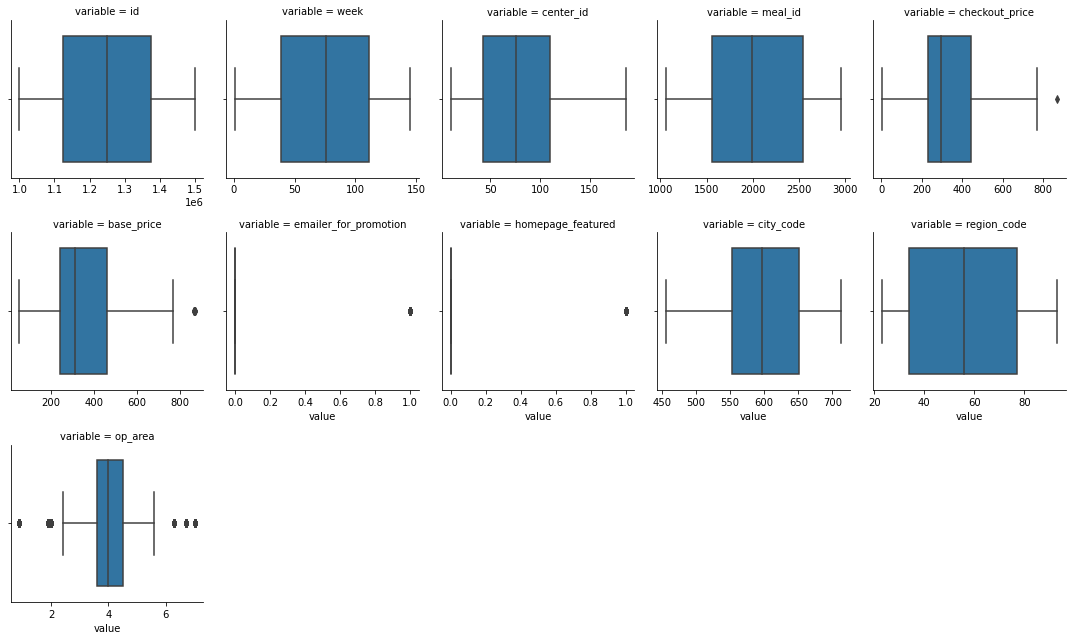

In [17]:
plt.figure(figsize=(15,15))
grid=sns.FacetGrid(melt,col='variable',col_wrap=5,sharex=False,sharey=False)
grid=grid.map(sns.boxplot,'value')


#### op_area,base_price,checkout_price has outliers

## Treating Outliers

## a) IQR method for base price

In [67]:
Q1=data['base_price'].quantile(0.25)
Q3=data['base_price'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-(IQR*1.5)
upper=Q3+(IQR*1.5)
data=data[(data['base_price']>lower) & (data['base_price']<upper)]
len(data) # deleted 8 rows after using outliers 


456540

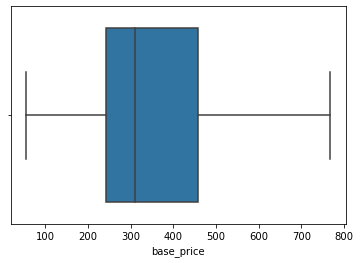

In [68]:
sns.boxplot(data['base_price'])
plt.show()

## b) IQR method for checkout price

In [69]:
Q1=data['checkout_price'].quantile(0.25)
Q3=data['checkout_price'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
data=data[(data['checkout_price']>lower) & (data['checkout_price']<upper)]
len(data) 

456540

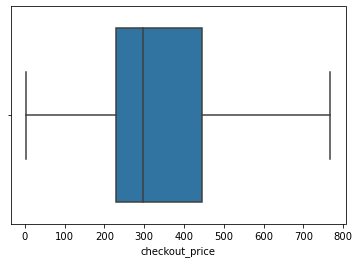

In [70]:
sns.boxplot(data['checkout_price'])
plt.show()

## c) operational area - Flooring and Capping method to treat outliers

In [71]:
Q1=data['op_area'].quantile(0.25) 
Q3=data['op_area'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
print(lower)
print(upper)

2.25
5.85


#### we cant afford to delete too many rows so by using Capping method we will treat outliers

In [72]:
data['op_area'] = np.where(data['op_area']<lower,lower,data['op_area'])
data['op_area'] = np.where(data['op_area']>upper,upper,data['op_area'])

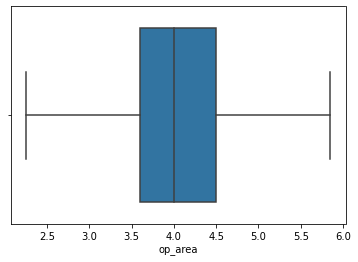

In [12]:
sns.boxplot(data['op_area'])
plt.show()

## After treating outliers

In [73]:
num_data=data.select_dtypes(np.number)  
num_data=num_data.drop('num_orders',axis=1)
num_col=num_data.columns
melt=pd.melt(data,value_vars=num_col)
melt.head()

,variable,value
0,id,1379560.0
1,id,1018704.0
2,id,1196273.0
3,id,1116527.0
4,id,1343872.0


<Figure size 1080x1080 with 0 Axes>

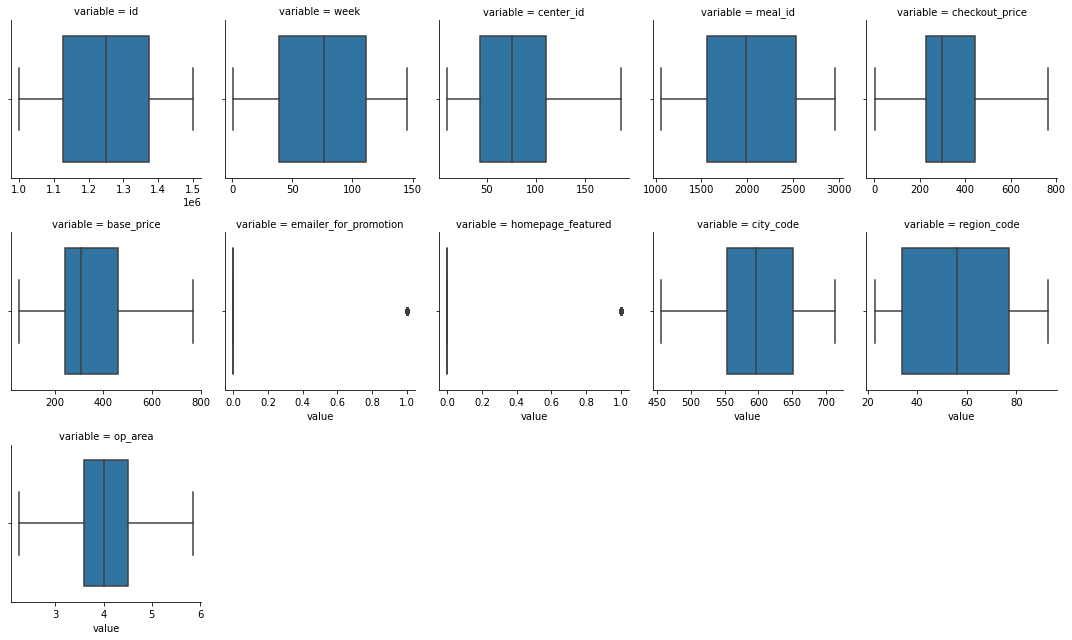

In [14]:
plt.figure(figsize=(15,15))
grid=sns.FacetGrid(melt,col='variable',col_wrap=5,sharex=False,sharey=False)
grid=grid.map(sns.boxplot,'value')


#### After outlier treatment there is no outliers

## statistical test

#### shapiro test

In [48]:
num_data=data.select_dtypes(np.number)

In [49]:
from scipy.stats import shapiro
for i in num_data.columns:
    print(i,'\t',shapiro(num_data[i])[1])

id 	 0.0
week 	 0.0
center_id 	 0.0
meal_id 	 0.0
checkout_price 	 0.0
base_price 	 0.0
emailer_for_promotion 	 0.0
homepage_featured 	 0.0
num_orders 	 0.0
city_code 	 0.0
region_code 	 0.0
op_area 	 0.0


As we can see data is not normal

#### Chi2 test for independence

In [50]:
## HO= features are independent(category, cuisine)
## H1= features are dependent
alpha=0.05
cat_cuis=pd.crosstab(data['category'],data['cuisine'])
import scipy.stats as st
print(st.chi2_contingency(cat_cuis))
# here as p_value(0.00) < alpha(0.05)
# we reject H0, that is features are dependent on each other

(984736.6954530542, 0.0, 39, array([[28793.59843606, 31545.86384545, 34434.83210672, 33115.70561178],
       [ 4641.10749989,  5084.73248346,  5550.39197004,  5337.76804661],
       [ 6595.35282341,  7225.77633504,  7887.51248521,  7585.35835633],
       [ 3053.39574627,  3345.25768607,  3651.61617821,  3511.73038945],
       [ 2293.53653349,  2512.76655715,  2742.88556315,  2637.81134621],
       [ 6614.4900184 ,  7246.74277829,  7910.39903404,  7607.36816927],
       [ 6235.12327069,  6831.11387392,  7456.7068603 ,  7171.05599509],
       [ 7460.80432383,  8173.95289788,  8922.52299908,  8580.71977921],
       [ 7521.59306085,  8240.5521882 ,  8995.22144828,  8650.63330267],
       [ 6429.87237263,  7044.47826696,  7689.61115127,  7395.03820914],
       [ 7495.25127481,  8211.69249573,  8963.71878696,  8620.3374425 ],
       [ 6058.16050291,  6637.2359399 ,  7245.07359706,  6967.52996013],
       [ 2853.69348797,  3126.46668419,  3412.7883099 ,  3282.05151794],
       [ 6741.02064879

In [51]:
# H0: features are independent(center_type,category)
# H1: features are dependent 
type_cat=pd.crosstab(data['center_type'],data['category'])
print(st.chi2_contingency(type_cat))
# here we reject H0 as p_value(0.0)<alpha(0.05)

(3363.444533811768, 0.0, 26, array([[73638.29668813, 11869.41784291, 16867.30990056,  7808.91844307,
         5865.61363955, 16916.2523919 , 15946.03947518, 19080.66209752,
        19236.1264818 , 16444.1012989 , 19168.75858194, 15493.46537872,
         7298.18915101, 17239.84862882],
       [26352.83624655,  4247.69228545,  6036.2810619 ,  2794.56693389,
         2099.11910895,  6053.79604416,  5706.58727822,  6828.37037718,
         6884.00620318,  5884.82798002,  6859.89734525,  5544.62520699,
         2611.79294257,  6169.60098567],
       [27898.86706532,  4496.88987164,  6390.40903754,  2958.51462303,
         2222.2672515 ,  6408.95156394,  6041.37324659,  7228.9675253 ,
         7287.86731502,  6230.07072108,  7262.34407281,  5869.90941429,
         2765.01790643,  6531.55038551]]))


In [52]:
typeA=data[data['center_type']=='TYPE_A']
typeB=data[data['center_type']=='TYPE_B']
typeC=data[data['center_type']=='TYPE_C']

In [100]:
# H0: Population means are equal
# H1: Population means are not equal
st.kruskal(typeA['num_orders'],typeB['num_orders'],typeC['num_orders'])

# as p value is too small we reject H0
# Population means are not equal.

KruskalResult(statistic=7816.260405431295, pvalue=0.0)

In [58]:
st.kruskal(typeA['num_orders'],typeB['num_orders'],typeC['num_orders'])

KruskalResult(statistic=7816.260405431295, pvalue=0.0)

In [96]:
Indain=data[data['cuisine']=='Indian']
Italian=data[data['cuisine']=='Italian']
Thai=data[data['cuisine']=='Thai']
Continental=data[data['cuisine']=='Continental']

In [101]:
# H0: Population means are equal
# H1: Population means are not equal
st.kruskal(Indain['num_orders'],Italian['num_orders'],Thai['num_orders'],Continental['num_orders'])

# as p value is too small we reject H0
# Population means are not equal.

KruskalResult(statistic=38794.50071932603, pvalue=0.0)

In [103]:
Beverages=data[data['category']=='Beverages']
Rice_Bowl=data[data['category']=='Rice Bowl']
Sandwich=data[data['category']=='Sandwich']
Pizza=data[data['category']=='Pizza']
Starters=data[data['category']=='Starters']
Other_Snacks=data[data['category']=='Other Snacks']
Desert=data[data['category']=='Desert']
Salad=data[data['category']=='Salad']
Pasta=data[data['category']=='Pasta']
Seafood=data[data['category']=='Seafood']
Biryani=data[data['category']=='Biryani']
Extras=data[data['category']=='Extras']
Soup=data[data['category']=='Soup']
Fish=data[data['category']=='Fish']

In [106]:
# H0: Population means are equal
# H1: Population means are not equal
st.kruskal(Beverages['num_orders'],Rice_Bowl['num_orders'],Sandwich['num_orders'],Pizza['num_orders'],Starters['num_orders'],Other_Snacks['num_orders'],Desert['num_orders'],Salad['num_orders'],Pasta['num_orders'],Seafood['num_orders'],Biryani['num_orders'],Extras['num_orders'],Soup['num_orders'],Fish['num_orders'])

# as p value is too small we reject H0
# Population means are not equal.

KruskalResult(statistic=186103.7830666648, pvalue=0.0)

In [ ]:
 # H1: There is a significant difference b/w pair of regions'salesmen performances.
# we need to convert table into 
dataframe: df = pd.DataFrame({'salesmen performance':[57,49,54,55,52,46,67,68,58], 'region':['n','n','n','s','s','s','w','w','w']}) 
    pairwise_tukeyhsd(df['salesmen performance'],df['region'],alpha=0.05).summary()
    The above summary table indicates that only between south and west region has significant difference in the average performances of salesmen.

## Encoding categorical dataset in numerical

In [74]:
num_data=data.select_dtypes(np.number)
cat_data=data.select_dtypes('object')
#cat_data=pd.get_dummies(cat_data)
#data=pd.concat([num_data,cat_data],axis=1)
#data.head()

In [75]:
cat_data=cat_data.drop('center_type',axis=1)
cent=pd.DataFrame(data['center_type'])

In [76]:
cat_data=pd.get_dummies(cat_data)

In [77]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
cent['center_type']=LE.fit_transform(cent['center_type'])

In [78]:
data1=pd.concat([num_data,cat_data,cent],axis=1)

In [79]:
data=data1

In [80]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,0,1,2
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,...,0,0,0,0,0,0,0,0,1,2
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,...,0,0,0,0,0,0,0,0,1,2
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,0,0,0,0,0,0,0,0,1,2
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,...,0,0,0,0,0,0,0,0,1,2


## Checking distribution

<Figure size 1080x1080 with 0 Axes>

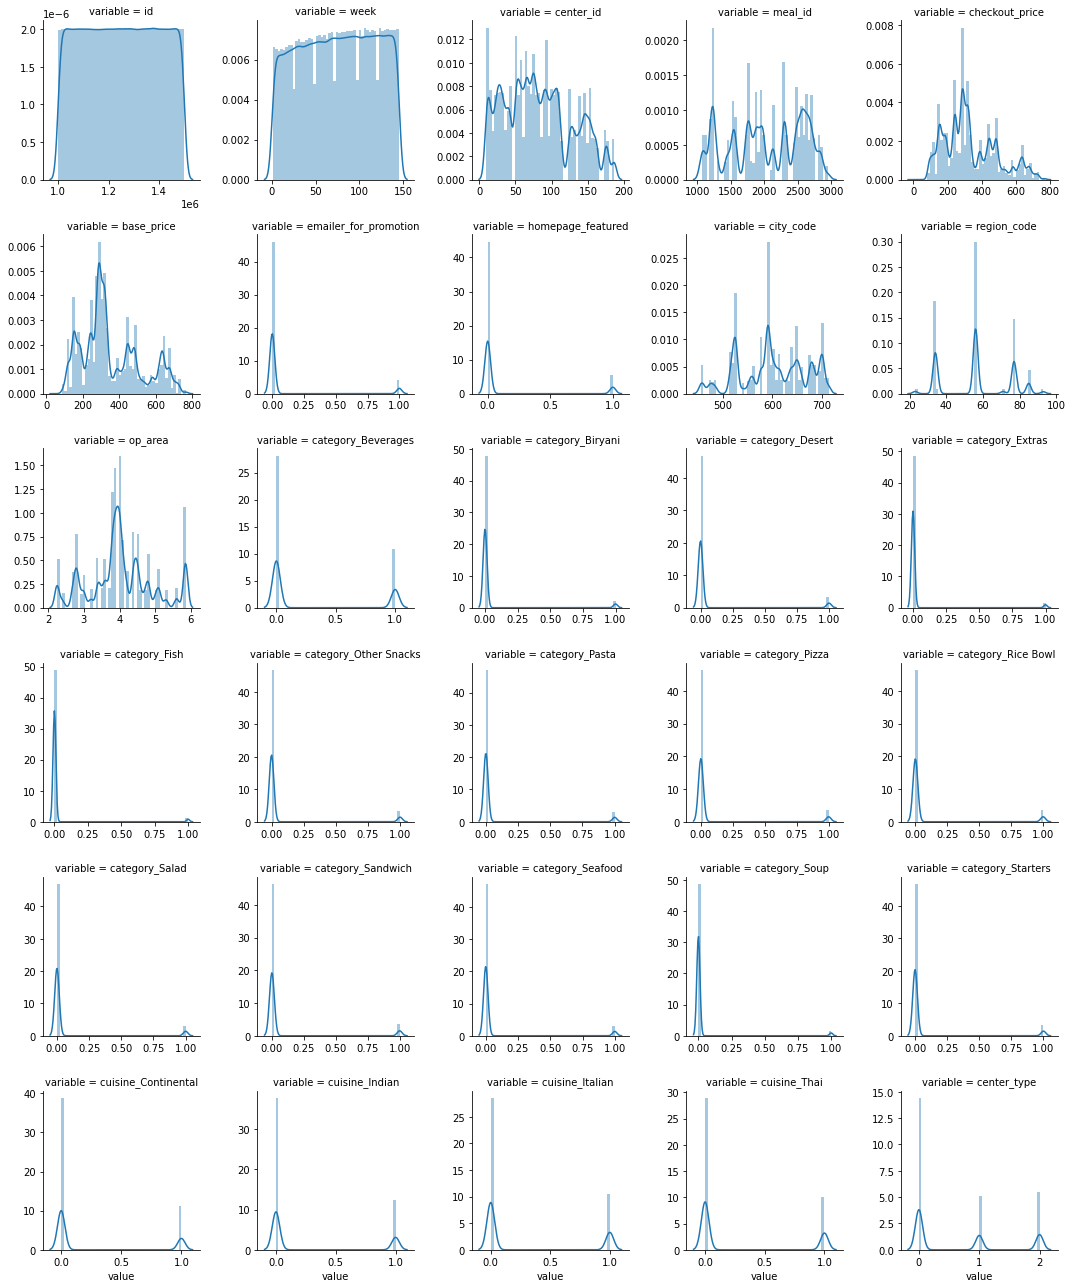

In [32]:
plt.figure(figsize=(15,15))
grid=sns.FacetGrid(melt,col='variable',col_wrap=5,sharex=False,sharey=False)
grid=grid.map(sns.distplot,'value')
plt.show()

## 1)

## train test split

In [20]:
X = data.drop('num_orders',axis=1) # Independent data
y = data['num_orders']             # dependent data

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)


In [22]:
import scipy.stats as stats 
# H0: Both train test represents data
# H1: Both train test does not represents data
stats.f_oneway(y_train,y_test,y)
# as p_value > alpha we accept H0. i.e. both train test represents data

F_onewayResult(statistic=0.20266604482491696, pvalue=0.8165509239962134)

# Power Transformation

In [23]:
from sklearn.preprocessing import PowerTransformer
P=PowerTransformer()
X_train=P.fit_transform(X_train)
X_test=P.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

# Scaling Dataset

In [24]:
from sklearn.preprocessing import MinMaxScaler
S=MinMaxScaler()
X_train = S.fit_transform(X_train)
X_test = S.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [26]:
X_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type
0,0.381959,0.566376,0.531830,0.421208,0.325248,0.272202,0.0,0.0,0.533777,0.521053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
1,0.101942,0.566376,0.303930,0.478228,0.325383,0.272353,0.0,0.0,0.478316,0.521053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
2,0.333207,0.866785,0.151522,0.771357,0.338231,0.286712,0.0,0.0,0.574016,0.902263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.779452
3,0.739877,0.685008,0.397638,0.787677,0.600921,0.574239,0.0,0.0,0.292287,0.801693,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
4,0.356996,0.527434,0.303930,0.243074,0.784912,0.775162,0.0,0.0,0.478316,0.521053,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000


In [25]:

#y_train=y_train.reset_index(drop=True)
#X_train_C=X_train_C.reset_index(drop=True)
#X_test_C=X_test_C.reset_index(drop=True)

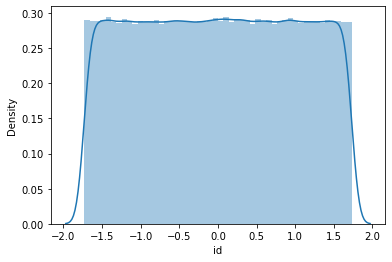

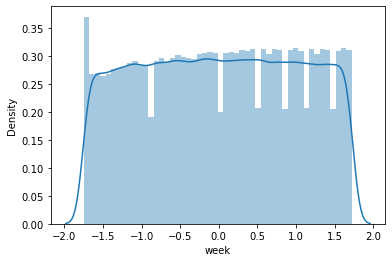

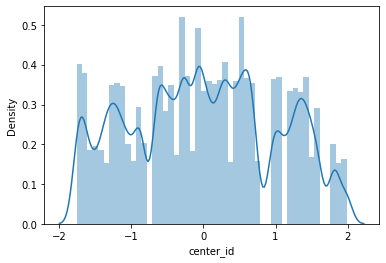

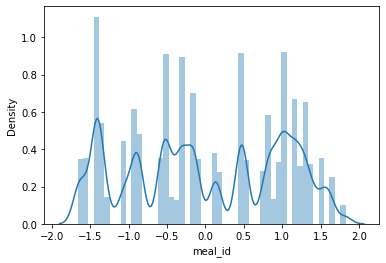

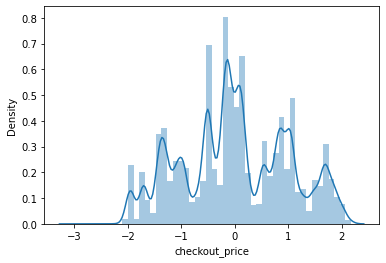

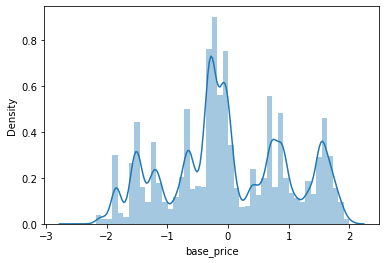

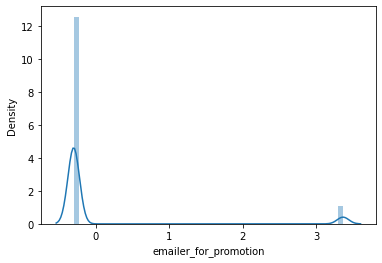

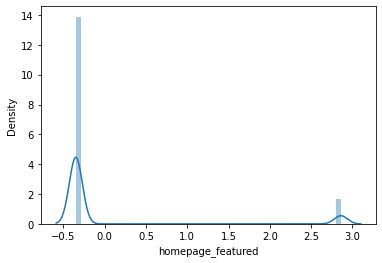

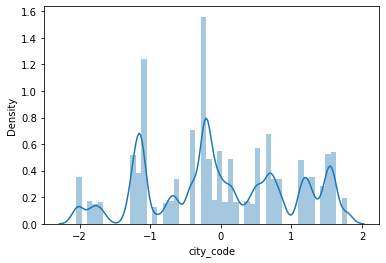

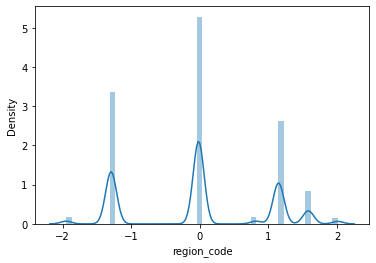

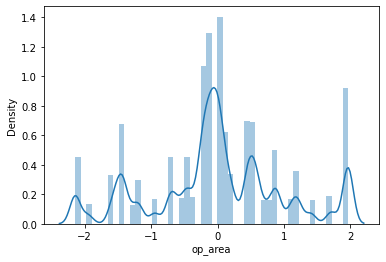

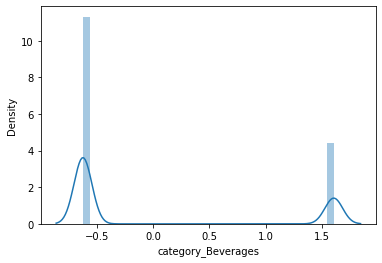

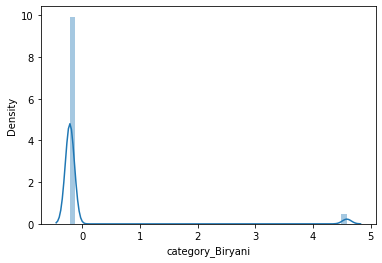

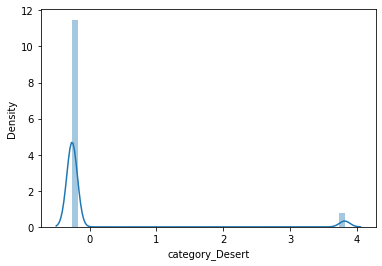

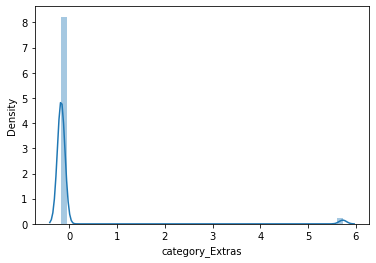

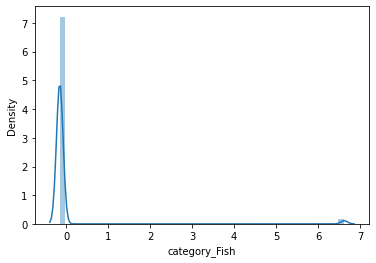

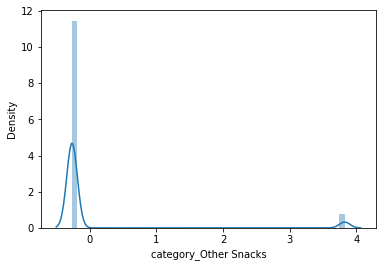

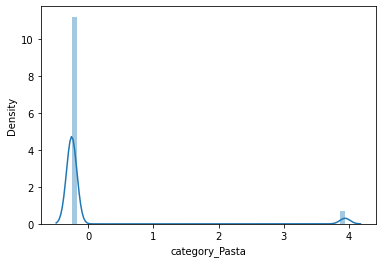

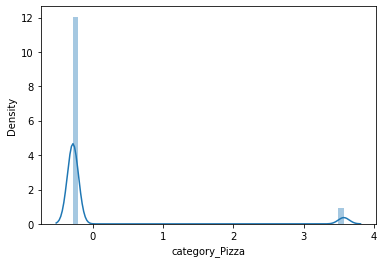

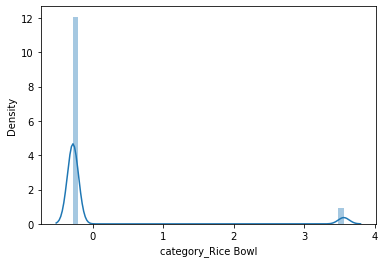

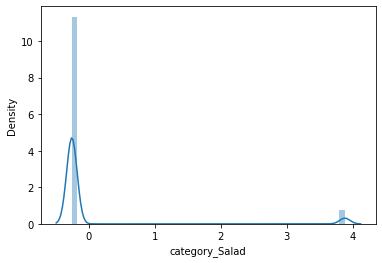

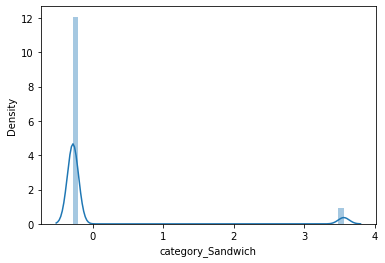

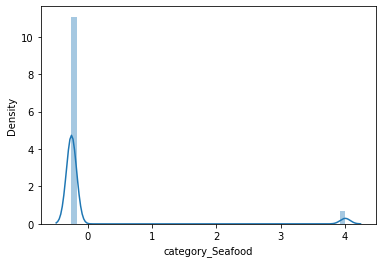

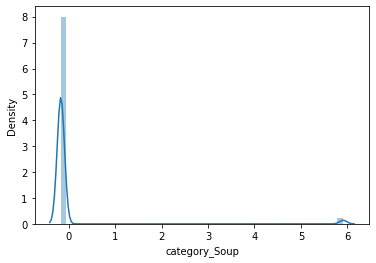

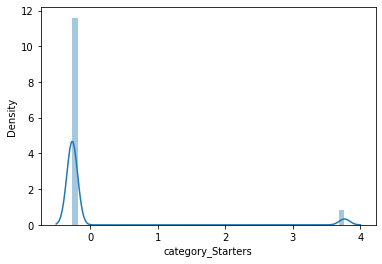

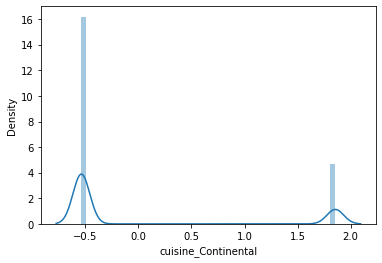

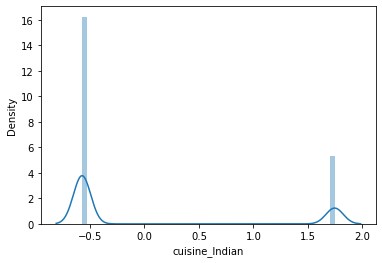

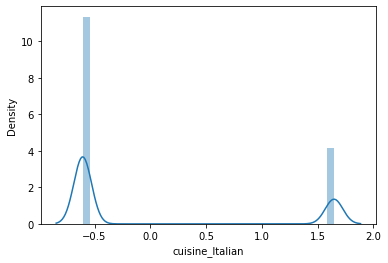

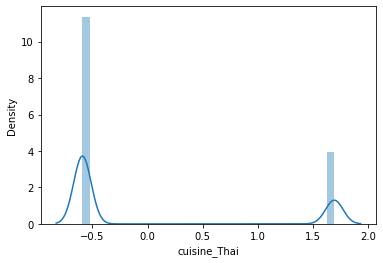

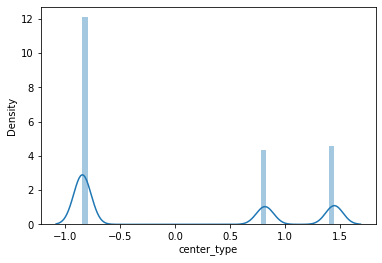

In [94]:
for i in X_train.columns:
    sns.distplot(X_train[i])
    plt.show()

## OLS full base model 

In [72]:
y_train=y_train.reset_index(drop=True)
import statsmodels.api as sm
X_train_C = sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_C).fit()
X_train_C=X_train_C.reset_index(drop=True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_orders   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     8105.
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:52:06   Log-Likelihood:            -2.2794e+06
No. Observations:              319578   AIC:                         4.559e+06
Df Residuals:                  319549   BIC:                         4.559e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   262.1207      0.536    489.076      0.000     261.070     263.171
id                        0.1366      0.536      0.255      0.799      -0.914       1.187
week                     -4.3243      0.541     -7.996      0.000      -5.384      -3.264
center_id               -20.0888      0.549    -36.599      0.000     -21.165     -19.013
meal_id                   6.5342      0.627     10.428      0.000       5.306       7.762
checkout_price         -156.0166      2.273    -68.649      0.000    -160.471    -151.562
base_price              101.3455      2.677     37.855      0.000      96.098     106.593
emailer_for_promotion    64.6334      0.663     97.516      0.000      63.334      65.932
homepage_featured        72.2195      0.608    118.743      0.000      71.027      73.412
city_code                 9.1588      0.544     16.830      0.000       8.092      10.225
region_code              11.3477      0.538     21.094      0.000      10.293      12.402
op_area                  77.0084      0.553    139.333      0.000      75.925      78.092
category_Beverages       10.7310      0.900     11.921      0.000       8.967      12.495
category_Biryani         24.6391      0.707     34.866      0.000      23.254      26.024
category_Desert          27.1106      0.744     36.423      0.000      25.652      28.569
category_Extras         -34.1700      0.635    -53.806      0.000     -35.415     -32.925
category_Fish            -0.3799      0.597     -0.636      0.525      -1.550       0.790
category_Other Snacks   -74.3679      0.682   -109.051      0.000     -75.705     -73.031
category_Pasta          -74.8531      0.706   -106.086      0.000     -76.236     -73.470
category_Pizza            9.3759      0.709     13.218      0.000       7.986      10.766
category_Rice Bowl      166.5350      0.702    237.193      0.000     165.159     167.911
category_Salad            3.0789      0.670      4.597      0.000       1.766       4.391
category_Sandwich        34.7537      0.665     52.248      0.000      33.450      36.057
category_Seafood        -11.1056      0.690    -16.084      0.000     -12.459      -9.752
category_Soup           -63.6754      0.600   -106.056      0.000     -64.852     -62.499
category_Starters       -69.1644      0.698    -99.140      0.000     -70.532     -67.797
cuisine_Continental     -29.7258      1.157    -25.700      0.000     -31.993     -27.459
cuisine_Indian         -111.1320      0.802   -138.616      0.000    -112.703    -109.561
cuisine_Italian          56.0610      0.770     72.774      0.000      54.551      57.571
cuisine_Thai             80.8940      1.037     78.021      0.000      78.862      82.926
center_type              -3.9227      0.549     -7.145      0.000      -4.999      -2.847
=======================

In [29]:
X_test_C=sm.add_constant(X_test)

In [30]:
y_pred_train=model.predict(X_train_C)

In [31]:
y_pred_test=model.predict(X_test_C)


In [73]:
from sklearn.metrics import mean_absolute_error,r2_score
print('r2_score for train',r2_score(y_train,y_pred_train))
print('r2_score for test',r2_score(y_test,y_pred_test))
print('mean absolute error',mean_absolute_error(y_train,y_pred_train))
print('mean absolute error',mean_absolute_error(y_test,y_pred_test))

r2_score for train 0.4163870431172976
r2_score for test 0.414004279610814
mean absolute error 163.24177462418672
mean absolute error 163.87602479754634


#### id base_price and category_fish is insignificant features so we deleted them from X_training data

In [25]:
X_train=X_train.drop(['id','base_price','category_Fish'],axis=1)

In [76]:
vif_data=pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data['vif']=[variance_inflation_factor(X_train.select_dtypes(np.number).values,i) for i in range(len(X_train.select_dtypes(np.number).columns))]
vif_data=pd.DataFrame(vif_data)
vif_data['features']=X_train.columns
vif_data.sort_values(by='vif',ascending=False)

,vif,features
23,inf,cuisine_Indian
25,inf,cuisine_Thai
24,inf,cuisine_Italian
22,inf,cuisine_Continental
9,14.228764,category_Beverages
3,7.765853,checkout_price
16,6.260760,category_Rice Bowl
18,5.892557,category_Sandwich
11,5.731030,category_Desert
21,5.516457,category_Starters


In [80]:
y_train=y_train.reset_index(drop=True)
import statsmodels.api as sm
X_train_C = sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_C).fit()
X_train_C=X_train_C.reset_index(drop=True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_orders   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     8980.
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:02:06   Log-Likelihood:            -2.2801e+06
No. Observations:              319578   AIC:                         4.560e+06
Df Residuals:                  319552   BIC:                         4.561e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   262.1207      0.537    487.984      0.000     261.068     263.174
week                     -4.5054      0.541     -8.325      0.000      -5.566      -3.445
center_id               -20.7448      0.550    -37.728      0.000     -21.823     -19.667
meal_id                   6.9640      0.627     11.101      0.000       5.734       8.194
checkout_price          -91.3320      1.493    -61.159      0.000     -94.259     -88.405
emailer_for_promotion    71.9965      0.635    113.374      0.000      70.752      73.241
homepage_featured        76.5939      0.598    127.991      0.000      75.421      77.767
city_code                 9.6699      0.545     17.735      0.000       8.601      10.739
region_code              12.0677      0.539     22.398      0.000      11.012      13.124
op_area                  76.6155      0.554    138.418      0.000      75.531      77.700
category_Beverages       -8.9565      1.303     -6.875      0.000     -11.510      -6.403
category_Biryani         26.0190      0.927     28.063      0.000      24.202      27.836
category_Desert          29.6352      1.005     29.497      0.000      27.666      31.604
category_Extras         -32.5654      0.805    -40.456      0.000     -34.143     -30.988
category_Other Snacks   -70.2510      0.944    -74.454      0.000     -72.100     -68.402
category_Pasta          -69.3356      0.759    -91.343      0.000     -70.823     -67.848
category_Pizza           11.0505      0.856     12.911      0.000       9.373      12.728
category_Rice Bowl      162.2773      1.025    158.254      0.000     160.268     164.287
category_Sandwich        32.3774      0.733     44.183      0.000      30.941      33.814
category_Seafood         -8.4049      0.802    -10.484      0.000      -9.976      -6.834
category_Soup           -63.1460      0.758    -83.290      0.000     -64.632     -61.660
category_Starters       -65.2714      0.960    -67.978      0.000     -67.153     -63.389
cuisine_Continental     -12.4490      1.021    -12.192      0.000     -14.450     -10.448
cuisine_Indian         -106.3208      0.793   -134.056      0.000    -107.875    -104.766
cuisine_Italian          52.4995      0.688     76.281      0.000      51.151      53.848
cuisine_Thai             63.2991      0.929     68.170      0.000      61.479      65.119
center_type              -3.8092      0.550     -6.923      0.000      -4.888      -2.731
==============================================================================
Omnibus:                   481814.574   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        821248931.088
Skew:                           8.859   Prob(JB):                         0.00
Kurtosis:                     250.712   Cond. No.                  

#### category fish is also insignificant feature so we will also deleted it from X_training data

In [26]:
X_train=X_train.drop('category_Salad',axis=1)

In [79]:
vif_data=pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data['vif']=[variance_inflation_factor(X_train.select_dtypes(np.number).values,i) for i in range(len(X_train.select_dtypes(np.number).columns))]
vif_data=pd.DataFrame(vif_data)
vif_data['features']=X_train.columns
vif_data.sort_values(by='vif',ascending=False)

,vif,features
22,inf,cuisine_Indian
24,inf,cuisine_Thai
23,inf,cuisine_Italian
21,inf,cuisine_Continental
3,7.729304,checkout_price
9,5.881926,category_Beverages
16,3.644316,category_Rice Bowl
11,3.498425,category_Desert
20,3.195339,category_Starters
13,3.085544,category_Other Snacks


#### id, base_price,category_fish, category_salad as they are insignificant feature so we will delete them from X_test data

In [27]:
X_test=X_test.drop(['id','base_price','category_Fish','category_Salad'],axis=1)

#### trying various models including Non-linear model 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [29]:
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()
model_ab = AdaBoostRegressor()
model_gb = GradientBoostingRegressor()
model_xg = XGBRegressor()

In [30]:
model_lr.fit(X_train,y_train)
model_dt.fit(X_train,y_train)
model_rf.fit(X_train,y_train)
model_ab.fit(X_train,y_train)
model_gb.fit(X_train,y_train)
model_xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
print('r2 value for linear base model',r2_score(y_train,model_lr.predict(X_train)))
print('r2 value for linear base model test',r2_score(y_test,model_lr.predict(X_test)))

r2 value for linear base model 0.41264030691749465
r2 value for linear base model test 0.4100050333824792


In [88]:
print('r2 value for decision tree base model train',r2_score(y_train,model_dt.predict(X_train)))
print('r2 value for decision tree base model test',r2_score(y_test,model_dt.predict(X_test)))

r2 value for decision tree base model train 1.0
r2 value for decision tree base model test 0.7176233261315568


In [89]:
print('r2 value for random forest base model train',r2_score(y_train,model_rf.predict(X_train)))
print('r2 value for random forest base model test',r2_score(y_test,model_rf.predict(X_test)))

r2 value for random forest base model train 0.9802817949514737
r2 value for random forest base model test 0.8537680897342541


In [90]:
print('r2 value for ada boost base model train',r2_score(y_train,model_ab.predict(X_train)))
print('r2 value for ada boost base model test',r2_score(y_test,model_ab.predict(X_test)))

r2 value for ada boost base model train -6.277717302554105
r2 value for ada boost base model test -6.365042663982429


In [91]:
print('r2 value for gradient boosting base model train',r2_score(y_train,model_gb.predict(X_train)))
print('r2 value for gradient boosting base model test',r2_score(y_test,model_gb.predict(X_test)))

r2 value for gradient boosting base model train 0.6658582277123664
r2 value for gradient boosting base model test 0.6615834405573339


In [31]:
print('r2 value for xg boosting base model train',r2_score(y_train,model_xg.predict(X_train)))
print('r2 value for xg boosting base model test',r2_score(y_test,model_xg.predict(X_test)))

r2 value for xg boosting base model train 0.8761890806065166
r2 value for xg boosting base model test 0.847303956685294


### XGBRegressor gave us good r2_score value so we will use it for final model.

In [32]:
from xgboost import XGBRegressor
model_xgb1 = XGBRegressor(
 learning_rate = 0.01,
 eval_metric ='mae',
    n_estimators = 50000,
    max_depth = 5,
    subsample = 0.8,
    colsample_bytree = 1,
    gamma = 0.5    
 )


model_xgb1.fit(X_train, y_train, eval_metric='mae', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=500, verbose=100)

[0]	validation_0-mae:258.18173
[100]	validation_0-mae:140.31091
[200]	validation_0-mae:123.71756
[300]	validation_0-mae:116.65031
[400]	validation_0-mae:111.06233
[500]	validation_0-mae:107.33574
[600]	validation_0-mae:104.42835
[700]	validation_0-mae:102.25999
[800]	validation_0-mae:100.79973
[900]	validation_0-mae:99.42220
[1000]	validation_0-mae:98.22433
[1100]	validation_0-mae:97.22503
[1200]	validation_0-mae:96.21429
[1300]	validation_0-mae:95.34290
[1400]	validation_0-mae:94.55167
[1500]	validation_0-mae:93.77171
[1600]	validation_0-mae:92.97594
[1700]	validation_0-mae:92.32169
[1800]	validation_0-mae:91.65190
[1900]	validation_0-mae:91.06420
[2000]	validation_0-mae:90.51580
[2100]	validation_0-mae:90.00263
[2200]	validation_0-mae:89.49940
[2300]	validation_0-mae:88.98144
[2400]	validation_0-mae:88.51530
[2500]	validation_0-mae:88.03507
[2600]	validation_0-mae:87.60932
[2700]	validation_0-mae:87.17282
[2800]	validation_0-mae:86.73875
[2900]	validation_0-mae:86.34161
[3000]	valida

[24400]	validation_0-mae:68.84972
[24500]	validation_0-mae:68.82737
[24600]	validation_0-mae:68.80861
[24700]	validation_0-mae:68.78635
[24800]	validation_0-mae:68.76810
[24900]	validation_0-mae:68.74571
[25000]	validation_0-mae:68.72570
[25100]	validation_0-mae:68.70647
[25200]	validation_0-mae:68.69209
[25300]	validation_0-mae:68.66979
[25400]	validation_0-mae:68.65250
[25500]	validation_0-mae:68.63086
[25600]	validation_0-mae:68.61036
[25700]	validation_0-mae:68.59240
[25800]	validation_0-mae:68.57275
[25900]	validation_0-mae:68.55486
[26000]	validation_0-mae:68.53784
[26100]	validation_0-mae:68.51907
[26200]	validation_0-mae:68.49741
[26300]	validation_0-mae:68.47682
[26400]	validation_0-mae:68.45709
[26500]	validation_0-mae:68.43802
[26600]	validation_0-mae:68.42064
[26700]	validation_0-mae:68.40030
[26800]	validation_0-mae:68.38519
[26900]	validation_0-mae:68.36852
[27000]	validation_0-mae:68.35058
[27100]	validation_0-mae:68.33132
[27200]	validation_0-mae:68.31325
[27300]	valida

[48500]	validation_0-mae:66.00751
[48600]	validation_0-mae:66.00185
[48700]	validation_0-mae:65.99199
[48800]	validation_0-mae:65.98463
[48900]	validation_0-mae:65.97530
[49000]	validation_0-mae:65.96727
[49100]	validation_0-mae:65.96146
[49200]	validation_0-mae:65.95519
[49300]	validation_0-mae:65.94643
[49400]	validation_0-mae:65.94062
[49500]	validation_0-mae:65.93302
[49600]	validation_0-mae:65.92665
[49700]	validation_0-mae:65.92030
[49800]	validation_0-mae:65.91304
[49900]	validation_0-mae:65.90779
[49999]	validation_0-mae:65.89997


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae',
             gamma=0.5, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50000, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
best_i = (model_xgb1.get_booster().best_iteration)
best_i

49998

In [34]:
xgb_model = XGBRegressor(
     
     learning_rate = 0.01,
   
    n_estimators = best_i,
    max_depth = 5,
    subsample = 0.8,
    colsample_bytree = 1,
    gamma = 0.5)

In [35]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=49998, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
print('r2 value for xgb_model base model train',r2_score(y_train,xgb_model.predict(X_train)))
print('r2 value for xgb_model base model test',r2_score(y_test,xgb_model.predict(X_test)))

r2 value for xgb_model base model train 0.950742335926767
r2 value for xgb_model base model test 0.8912944900153724


In [37]:
xgb_model.feature_importances_

array([0.00758144, 0.01320449, 0.02186505, 0.02905108, 0.05335447,
       0.07596999, 0.00803882, 0.02291477, 0.03869833, 0.03176359,
       0.01273085, 0.00380362, 0.00821152, 0.00722809, 0.09511208,
       0.02352422, 0.12871808, 0.07757849, 0.00444034, 0.07813171,
       0.01338576, 0.02120781, 0.11574001, 0.06747805, 0.02264923,
       0.01761807], dtype=float32)

In [53]:
column=[]
for i in X_train.columns:
    column.append(i)

In [57]:
imp=[]
for i in xgb_model.feature_importances_:
    imp.append(i)

In [61]:
pd.DataFrame({'features':column,'score':imp}).sort_values(ascending=False,by='score')

,features,score
16,category_Rice Bowl,0.128718
22,cuisine_Indian,0.115740
14,category_Pasta,0.095112
19,category_Soup,0.078132
17,category_Sandwich,0.077578
5,homepage_featured,0.075970
23,cuisine_Italian,0.067478
4,emailer_for_promotion,0.053354
8,op_area,0.038698
9,category_Beverages,0.031764
